In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer = pd.read_csv('Customers.csv')

In [3]:
customer.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
customer.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [5]:
customer.duplicated().sum()

np.int64(0)

In [6]:
Region_customers = customer['Region'].value_counts()

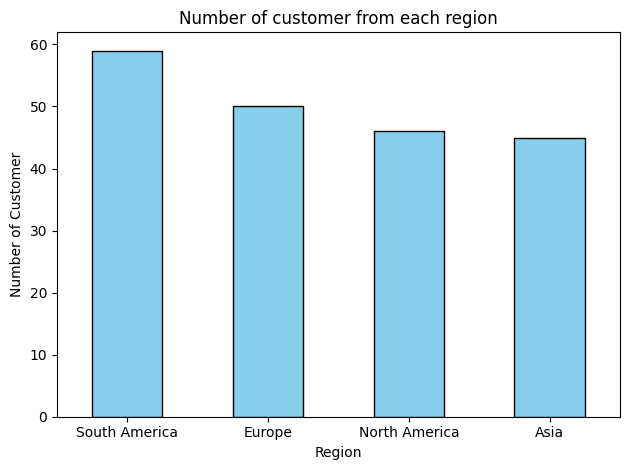

In [7]:
Region_customers.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of customer from each region')
plt.xlabel('Region')
plt.ylabel('Number of Customer')
plt.xticks(rotation=0)
plt.tight_layout()

In [8]:
date = pd.to_datetime(customer['SignupDate'])
customer['SignUp_month'] = date.dt.month
month = customer['SignUp_month'].value_counts().sort_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

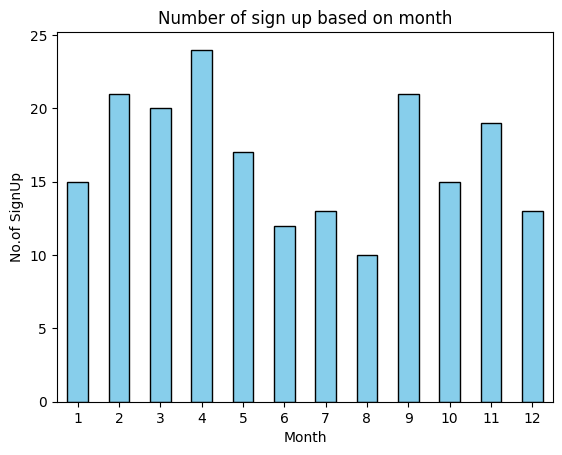

In [9]:
# Plot the bar chart
month.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.title('Number of sign up based on month')
plt.xlabel('Month')
plt.ylabel('No.of SignUp')
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, '2024'), Text(1, 0, '2022'), Text(2, 0, '2023')])

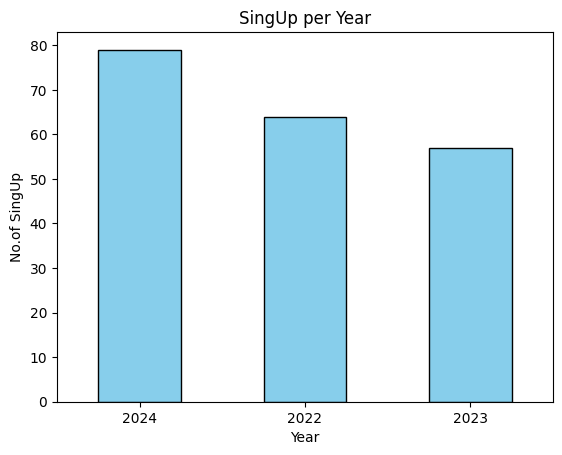

In [10]:
year = date.dt.year
year = year.value_counts()
year.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('SingUp per Year')
plt.xlabel('Year')
plt.ylabel('No.of SingUp')
plt.xticks(rotation=0)

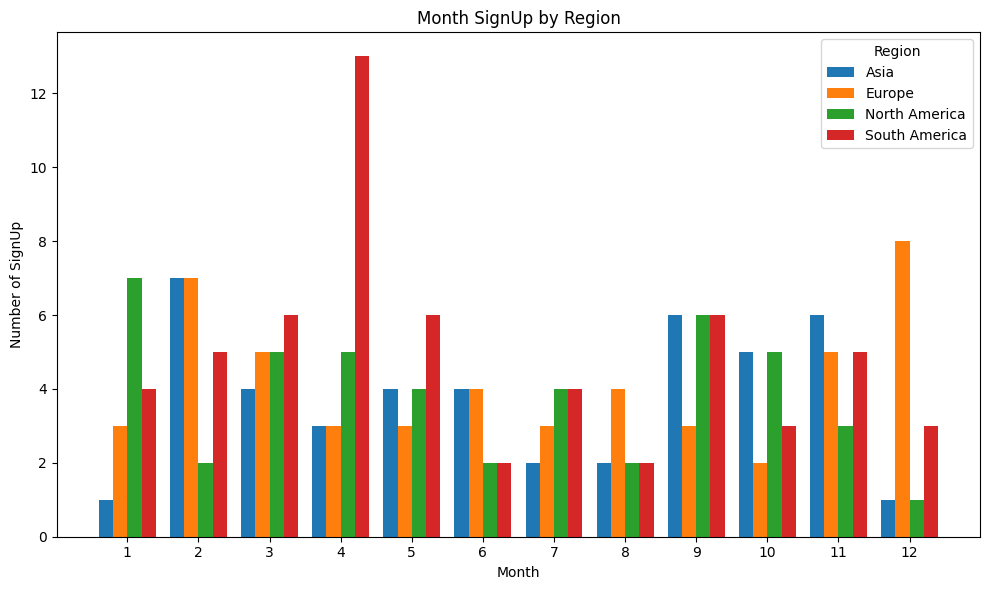

In [11]:
grouped = customer.groupby(['Region', 'SignUp_month']).size().unstack(fill_value=0)

all_months = range(1, 13)
grouped = grouped.reindex(columns=all_months, fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2  
x = np.arange(len(all_months))  

for i, country in enumerate(grouped.index):
    ax.bar(x + i * width, grouped.loc[country], width, label=country)

ax.set_title('Month SignUp by Region')
ax.set_xlabel('Month')
ax.set_ylabel('Number of SignUp')
ax.set_xticks(x + width * (len(grouped.index) - 1) / 2) 
ax.set_xticklabels(all_months)
ax.legend(title='Region')
plt.tight_layout()

In [12]:
products = pd.read_csv('Products.csv')

In [13]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [14]:
products.isnull().sum()  

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [15]:
products.duplicated().sum()

np.int64(0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Electronics'),
  Text(2, 0, 'Clothing'),
  Text(3, 0, 'Home Decor')])

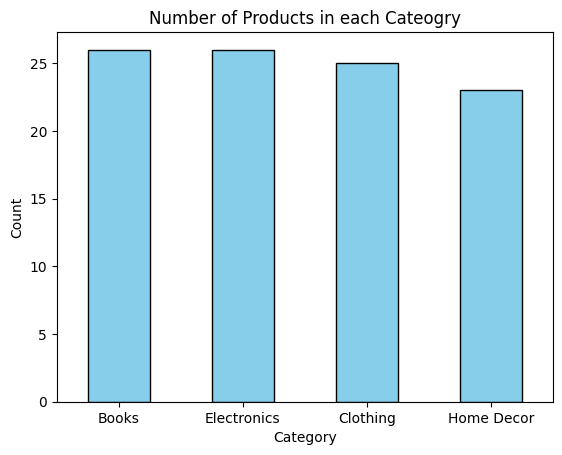

In [16]:
category = products['Category'].value_counts()
category.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Products in each Cateogry')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)

In [17]:
products['Price'].describe()

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64

In [18]:
min_price_row = products.loc[products['Price'].idxmin()]
print(min_price_row)

ProductID                      P056
ProductName    SoundWave Smartwatch
Category                Electronics
Price                         16.08
Name: 55, dtype: object


In [19]:
max_price_row = products.loc[products['Price'].idxmax()]
print(max_price_row)

ProductID                  P075
ProductName    TechPro Textbook
Category                  Books
Price                    497.76
Name: 74, dtype: object


In [20]:
average_price_per_category = products.groupby('Category')['Price'].mean()
print(average_price_per_category)

Category
Books          292.212308
Clothing       263.720000
Electronics    275.353462
Home Decor     235.020000
Name: Price, dtype: float64


In [21]:
transactions = pd.read_csv('Transactions.csv')

In [22]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [23]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [24]:
transactions.duplicated().sum()

np.int64(0)

In [25]:
transaction_date = pd.to_datetime(transactions['TransactionDate'])
transactions['transaction_month'] = transaction_date.dt.month
transactions['transaction_year'] = transaction_date.dt.year

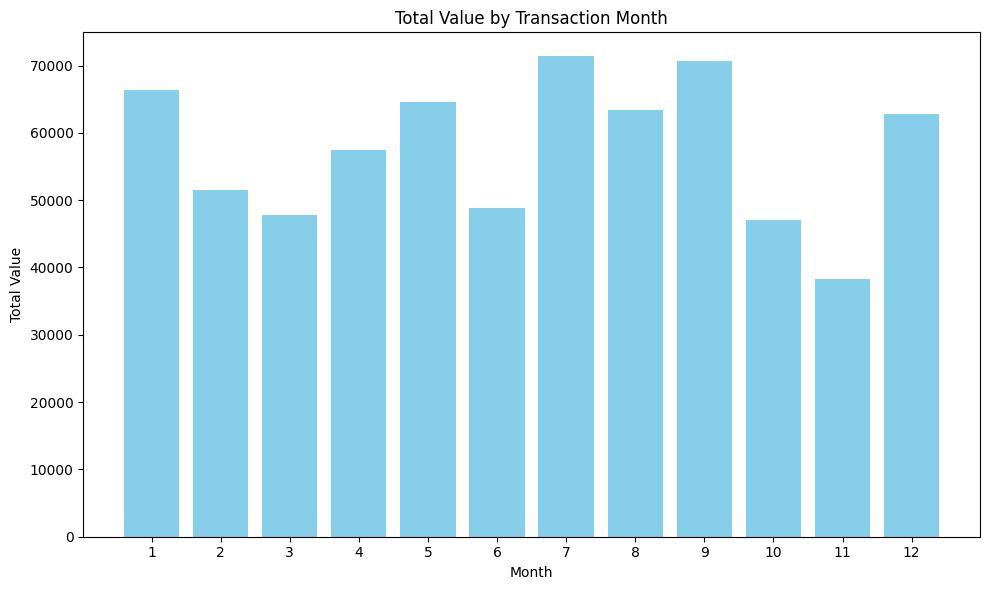

In [26]:
monthly_sum = transactions.groupby('transaction_month')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(monthly_sum['transaction_month'], monthly_sum['TotalValue'], color='skyblue')

plt.title('Total Value by Transaction Month')
plt.xlabel('Month')
plt.ylabel('Total Value')

plt.xticks(monthly_sum['transaction_month'])  
plt.tight_layout() 

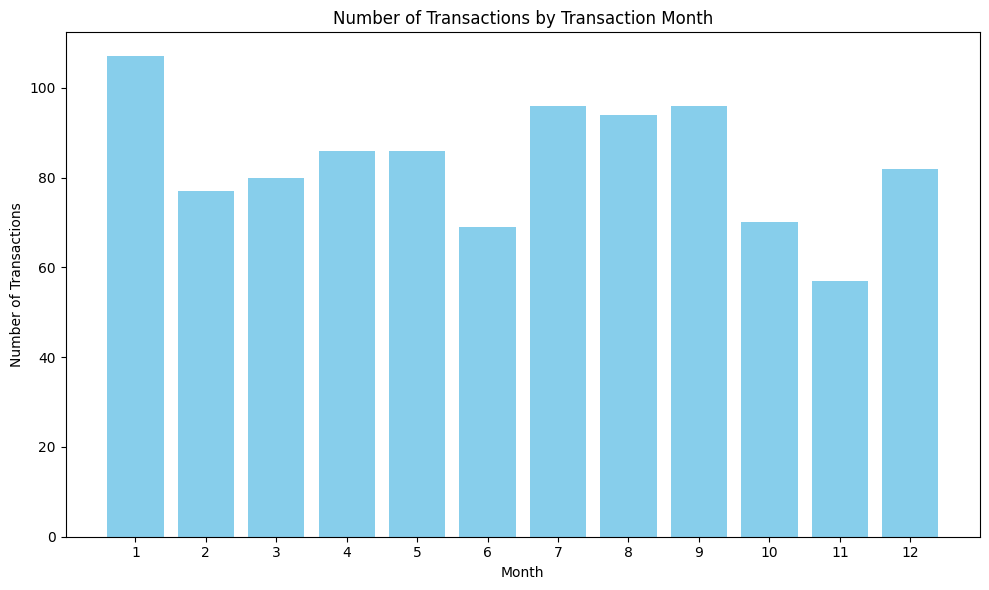

In [27]:
monthly_count = transactions.groupby('transaction_month').size().reset_index(name='Number of Transactions')

plt.figure(figsize=(10, 6))
plt.bar(monthly_count['transaction_month'], monthly_count['Number of Transactions'], color='skyblue')

plt.title('Number of Transactions by Transaction Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

plt.xticks(monthly_count['transaction_month'])  
plt.tight_layout()  

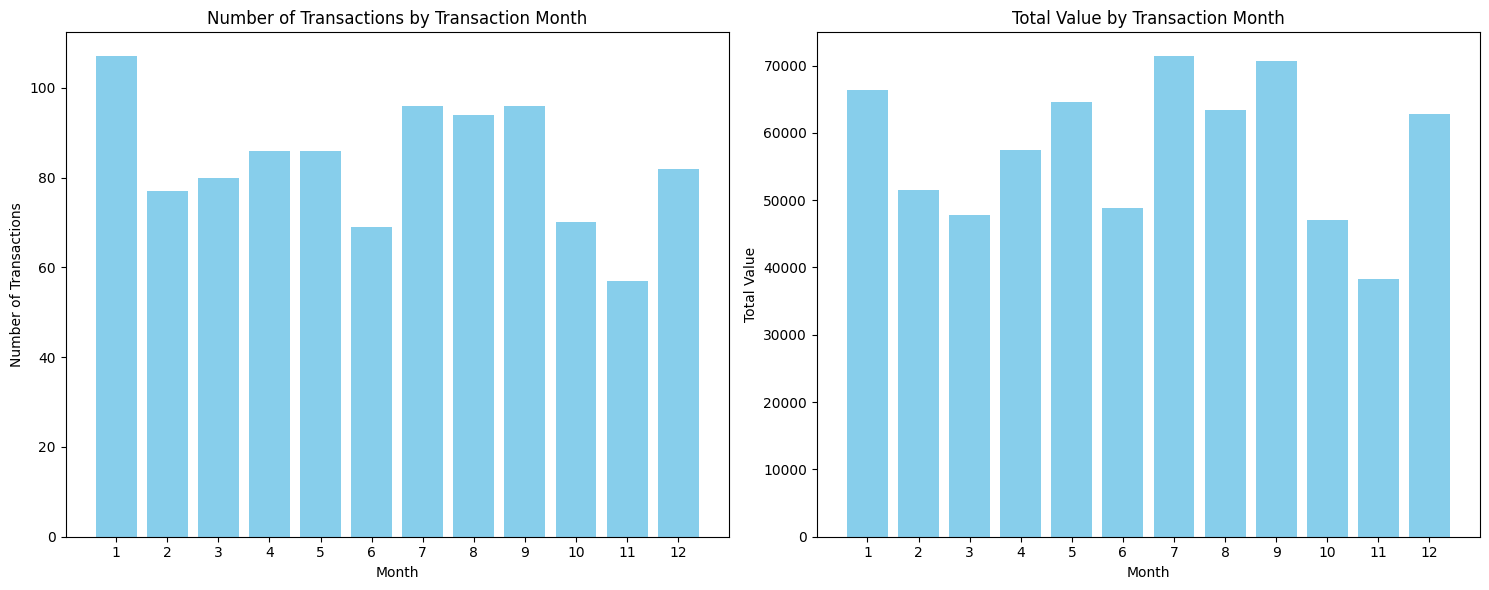

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].bar(monthly_count['transaction_month'], monthly_count['Number of Transactions'], color='skyblue')
ax[0].set_title('Number of Transactions by Transaction Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Number of Transactions')
ax[0].set_xticks(monthly_count['transaction_month'])

ax[1].bar(monthly_sum['transaction_month'], monthly_sum['TotalValue'], color='skyblue')
ax[1].set_title('Total Value by Transaction Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Total Value')
ax[1].set_xticks(monthly_sum['transaction_month'])

plt.tight_layout()

   transaction_year  TotalValue
0              2023     3769.52
1              2024   686226.04


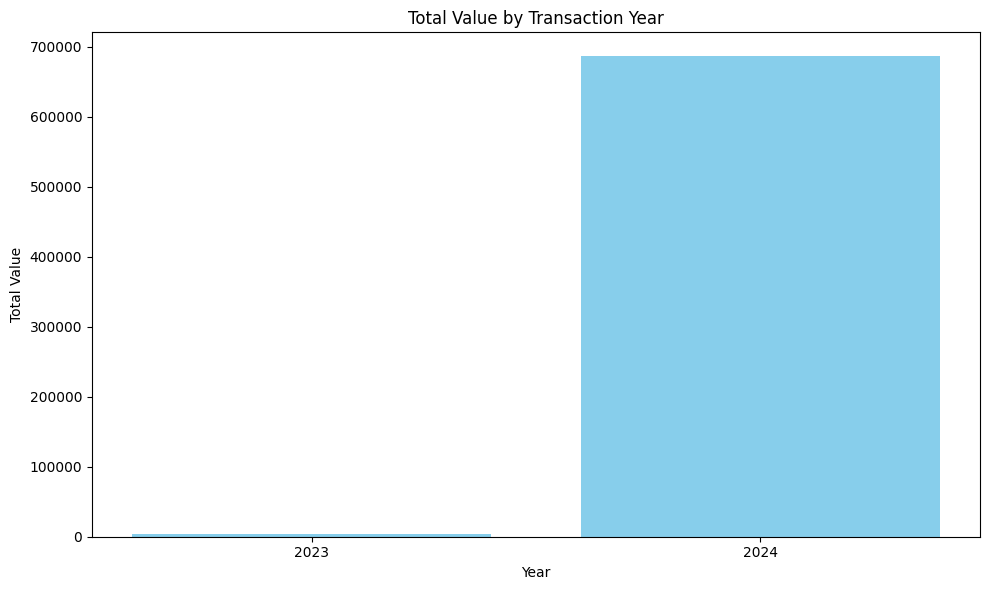

In [29]:
monthly_sum = transactions.groupby('transaction_year')['TotalValue'].sum().reset_index()
print(monthly_sum)
plt.figure(figsize=(10, 6))
plt.bar(monthly_sum['transaction_year'], monthly_sum['TotalValue'], color='skyblue')

plt.title('Total Value by Transaction Year')
plt.xlabel('Year')
plt.ylabel('Total Value')

# Show plot
plt.xticks(monthly_sum['transaction_year'])  
plt.tight_layout()  

In [30]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

transactions['Hour'] = transactions['TransactionDate'].dt.hour

def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

transactions['TimePeriod'] = transactions['Hour'].apply(categorize_time)

time_period_counts = transactions.groupby('TimePeriod').size().reset_index(name='TransactionCount')

print(time_period_counts)

  TimePeriod  TransactionCount
0  Afternoon               261
1    Evening               250
2    Morning               248
3      Night               241


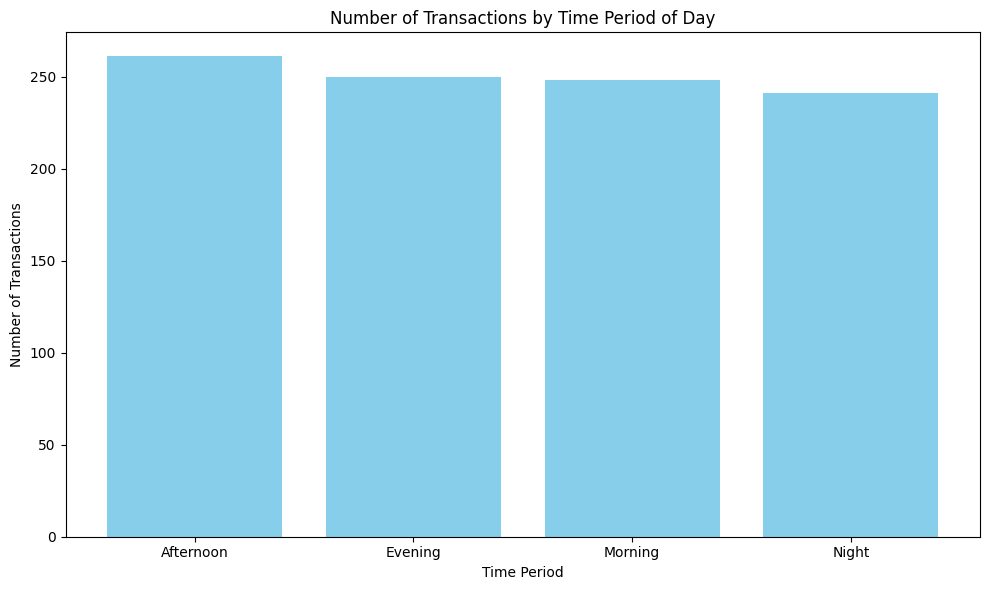

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(time_period_counts['TimePeriod'], time_period_counts['TransactionCount'], color='skyblue')

plt.title('Number of Transactions by Time Period of Day')
plt.xlabel('Time Period')
plt.ylabel('Number of Transactions')

plt.tight_layout()
plt.show()

In [32]:
merged_csv = pd.merge(customer,transactions, on='CustomerID', how='inner')
product_selected = products[['ProductID','Category','ProductName']]
final_csv = pd.merge(merged_csv, product_selected, on='ProductID', how = 'inner')

In [33]:
final_csv.head()

,CustomerID,CustomerName,Region,SignupDate,SignUp_month,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,transaction_month,transaction_year,Hour,TimePeriod,Category,ProductName
0,C0001,Lawrence Carroll,South America,2022-07-10,7,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,1,2024,3,Night,Books,SoundWave Cookbook
1,C0001,Lawrence Carroll,South America,2022-07-10,7,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,9,2024,9,Morning,Home Decor,HomeSense Wall Art
2,C0001,Lawrence Carroll,South America,2022-07-10,7,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,4,2024,0,Night,Electronics,SoundWave Headphones
3,C0001,Lawrence Carroll,South America,2022-07-10,7,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,5,2024,3,Night,Electronics,ActiveWear Smartwatch
4,C0001,Lawrence Carroll,South America,2022-07-10,7,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,11,2024,17,Afternoon,Electronics,TechPro Headphones


          Region  TotalValue_Sum  TotalValue_Avg
0           Asia       152074.97      697.591606
1         Europe       166254.63      710.489872
2  North America       152313.40      624.235246
3  South America       219352.56      721.554474


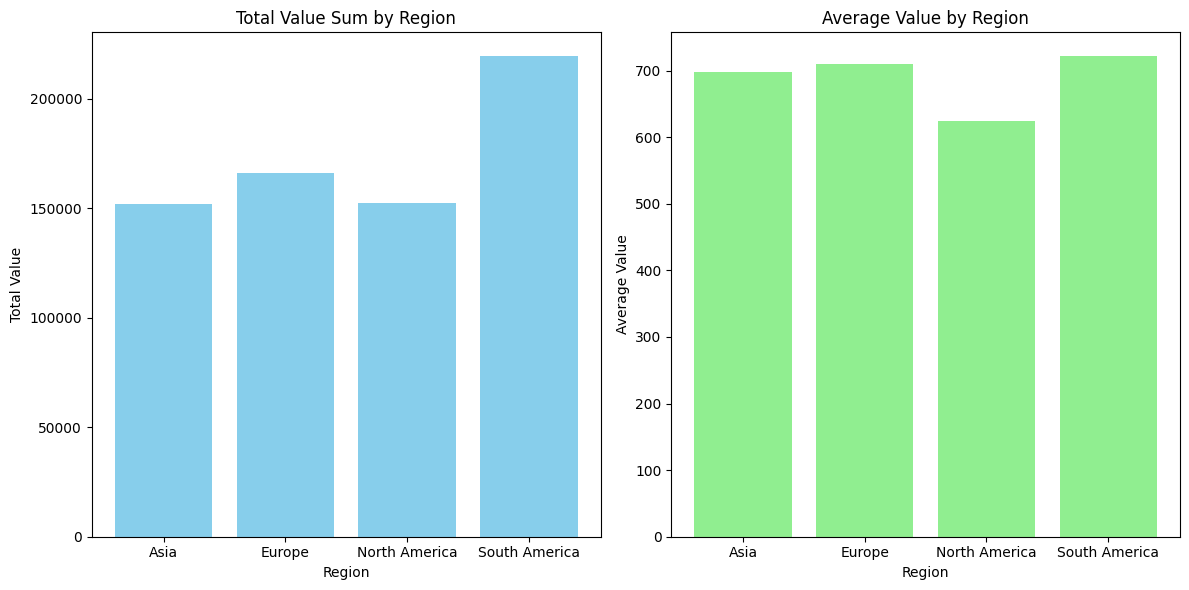

In [34]:
result = final_csv.groupby('Region').agg(
    TotalValue_Sum=('TotalValue', 'sum'),
    TotalValue_Avg=('TotalValue', 'mean')
).reset_index()

print(result)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(result['Region'], result['TotalValue_Sum'], color='skyblue')
ax1.set_title('Total Value Sum by Region')
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Value')

ax2.bar(result['Region'], result['TotalValue_Avg'], color='lightgreen')
ax2.set_title('Average Value by Region')
ax2.set_xlabel('Region')
ax2.set_ylabel('Average Value')

plt.tight_layout()
plt.show()

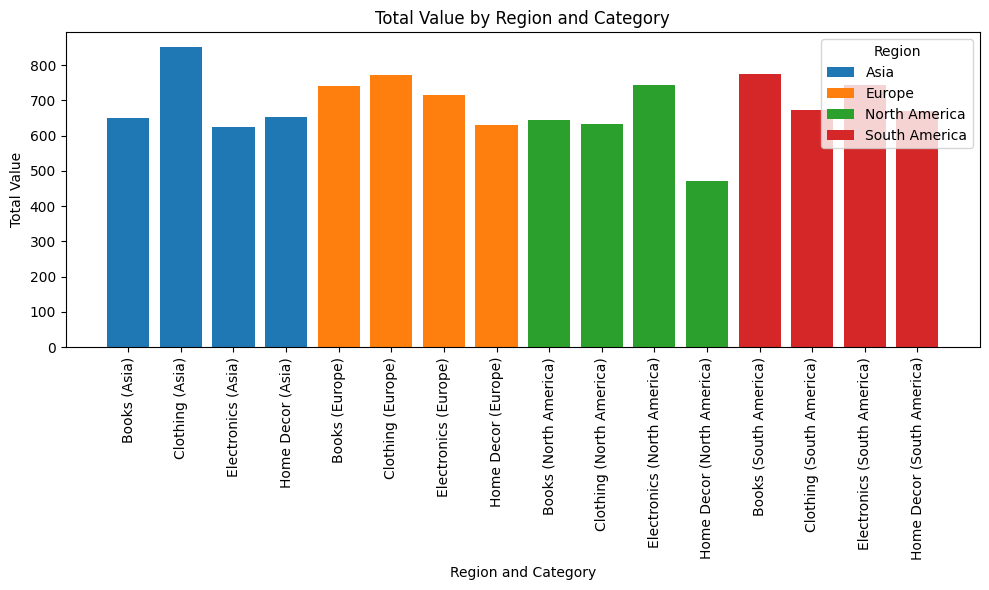

In [35]:
region_category_sum = final_csv.groupby(['Region', 'Category'])['TotalValue'].mean().reset_index()
plt.figure(figsize=(10, 6))
for label, df in region_category_sum.groupby('Region'):
    plt.bar(df['Category'] + ' (' + label + ')', df['TotalValue'], label=label)

plt.title('Total Value by Region and Category')
plt.xlabel('Region and Category')
plt.ylabel('Total Value')
plt.xticks(rotation=90)  

plt.legend(title='Region')
plt.tight_layout()

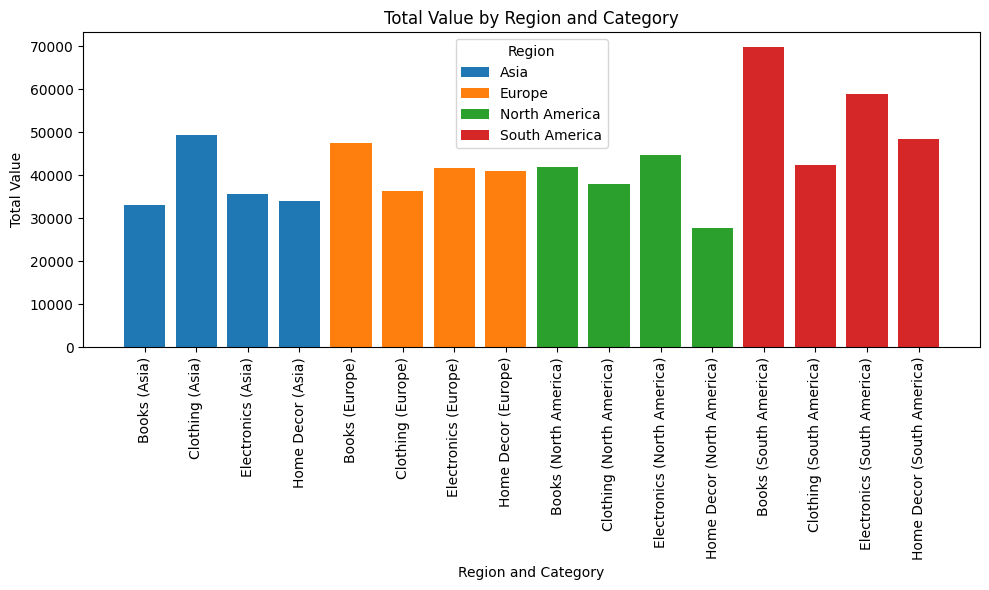

In [36]:
region_category_sum = final_csv.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
for label, df in region_category_sum.groupby('Region'):
    plt.bar(df['Category'] + ' (' + label + ')', df['TotalValue'], label=label)

plt.title('Total Value by Region and Category')
plt.xlabel('Region and Category')
plt.ylabel('Total Value')
plt.xticks(rotation=90)  

plt.legend(title='Region')
plt.tight_layout()

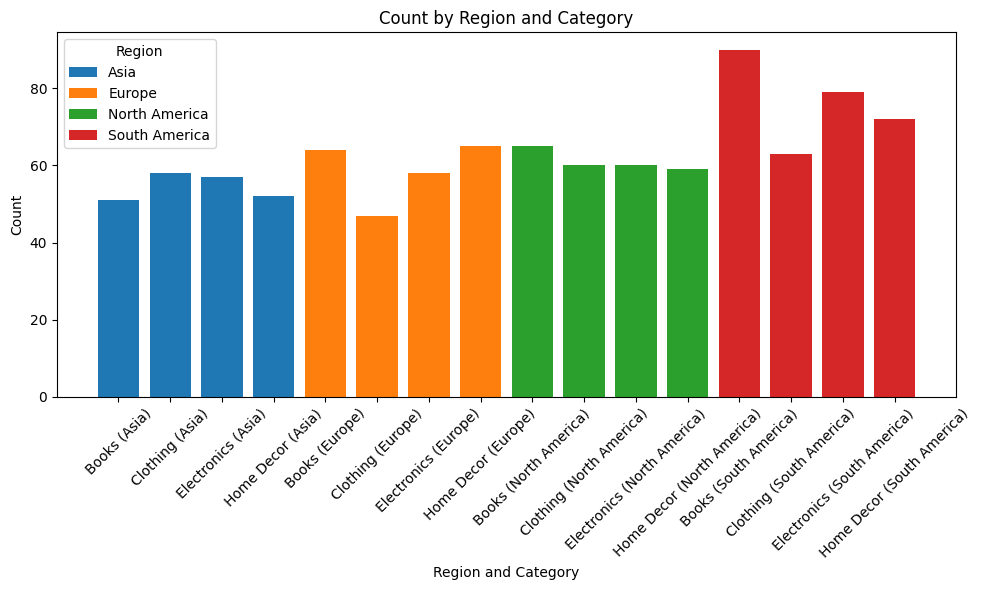

In [37]:
region_category_count = final_csv.groupby(['Region', 'Category']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
for label, df in region_category_count.groupby('Region'):
    plt.bar(df['Category'] + ' (' + label + ')', df['Count'], label=label)

plt.title('Count by Region and Category')
plt.xlabel('Region and Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Region')
plt.tight_layout()

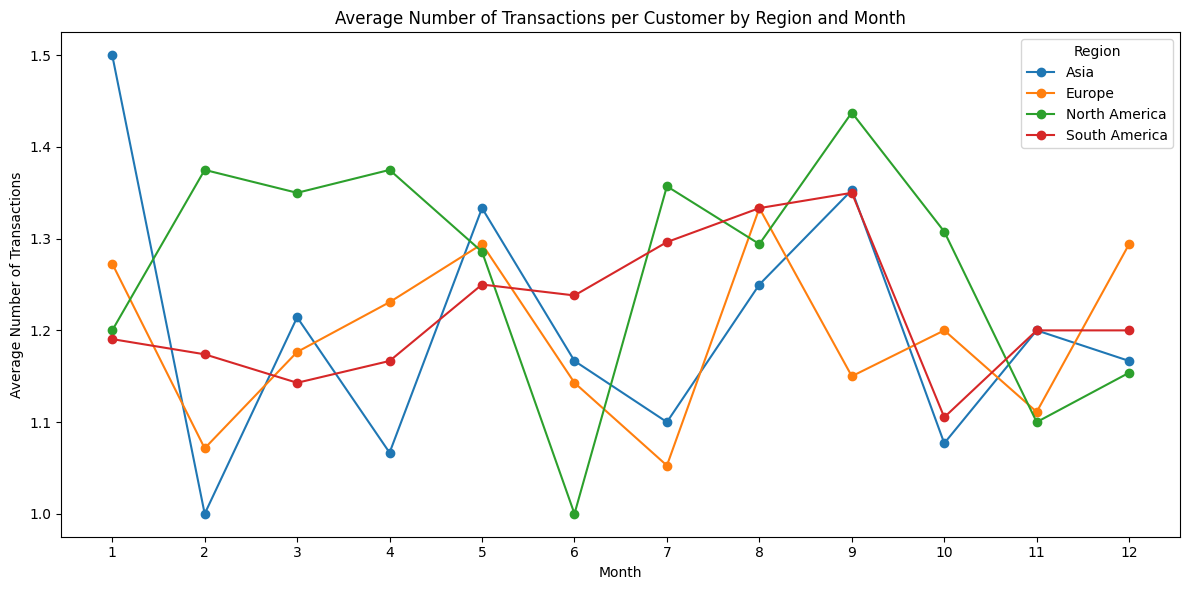

In [38]:
monthly_customer_transactions = final_csv.groupby(['Region', 'transaction_month', 'CustomerID']).size().reset_index(name='TransactionCount')

average_transactions = monthly_customer_transactions.groupby(['Region', 'transaction_month'])['TransactionCount'].mean().reset_index(name='AverageTransactions')

plt.figure(figsize=(12, 6))

for region in average_transactions['Region'].unique():
    region_data = average_transactions[average_transactions['Region'] == region]
    plt.plot(region_data['transaction_month'], region_data['AverageTransactions'], label=region, marker='o')

plt.title('Average Number of Transactions per Customer by Region and Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Transactions')
plt.legend(title='Region')
plt.xticks(range(1, 13))
plt.tight_layout()  

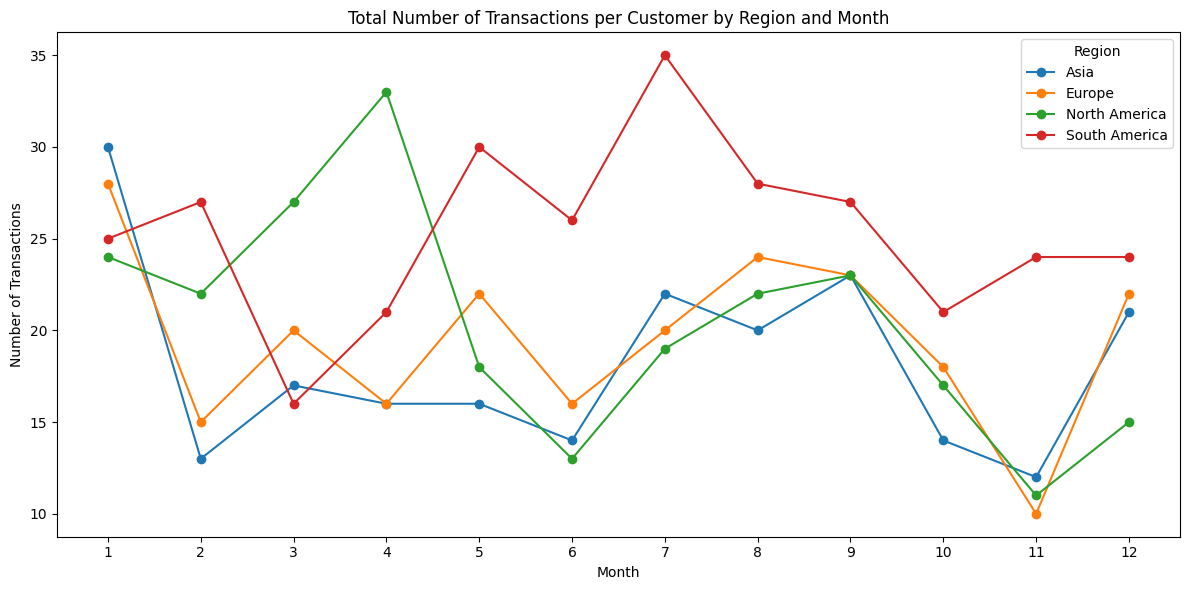

In [39]:
monthly_customer_transactions = final_csv.groupby(['Region', 'transaction_month', 'CustomerID']).size().reset_index(name='TransactionCount')

average_transactions = monthly_customer_transactions.groupby(['Region', 'transaction_month'])['TransactionCount'].sum().reset_index(name='AverageTransactions')

plt.figure(figsize=(12, 6))

for region in average_transactions['Region'].unique():
    region_data = average_transactions[average_transactions['Region'] == region]
    plt.plot(region_data['transaction_month'], region_data['AverageTransactions'], label=region, marker='o')

plt.title('Total Number of Transactions per Customer by Region and Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Region')
plt.xticks(range(1, 13))  
plt.tight_layout()  

In [40]:
grouped = final_csv.groupby(['TransactionID', 'CustomerID', 'ProductID','Category']).agg({'Quantity': 'sum'}).reset_index()

total_quantity_per_customer = grouped.groupby(['CustomerID', 'ProductID', 'Category']).agg({'Quantity': 'sum', 'TransactionID': 'nunique'}).reset_index()

total_quantity_per_customer['AvgQuantityPerTransaction'] = total_quantity_per_customer['Quantity'] / total_quantity_per_customer['TransactionID']

multiple_purchases = total_quantity_per_customer[total_quantity_per_customer['TransactionID'] > 1]

print(multiple_purchases['Category'].value_counts())

Category
Clothing       10
Home Decor      7
Electronics     5
Books           3
Name: count, dtype: int64


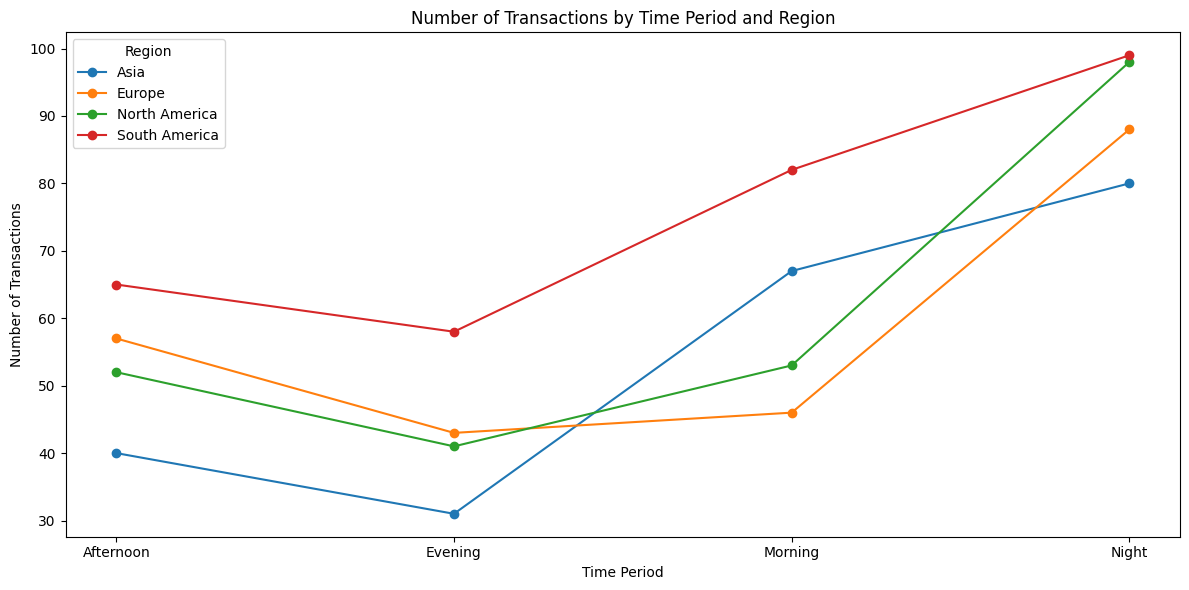

In [41]:
final_csv['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# final_csv['hour'] = final_csv['TransactionDate'].dt.hour

def get_time_period(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

final_csv['TimePeriod'] = final_csv['Hour'].apply(get_time_period)

transaction_counts = final_csv.groupby(['Region', 'TimePeriod']).size().reset_index(name='TransactionCount')

plt.figure(figsize=(12, 6))

for region in transaction_counts['Region'].unique():
    region_data = transaction_counts[transaction_counts['Region'] == region]
    plt.plot(region_data['TimePeriod'], region_data['TransactionCount'], label=region, marker='o')

plt.title('Number of Transactions by Time Period and Region')
plt.xlabel('Time Period')
plt.ylabel('Number of Transactions')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [42]:
final_csv.head()

,CustomerID,CustomerName,Region,SignupDate,SignUp_month,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,transaction_month,transaction_year,Hour,TimePeriod,Category,ProductName
0,C0001,Lawrence Carroll,South America,2022-07-10,7,T00015,P054,2024-08-25 12:38:23,2,114.60,57.30,1,2024,3,Night,Books,SoundWave Cookbook
1,C0001,Lawrence Carroll,South America,2022-07-10,7,T00932,P022,2024-05-27 22:23:54,3,412.62,137.54,9,2024,9,Morning,Home Decor,HomeSense Wall Art
2,C0001,Lawrence Carroll,South America,2022-07-10,7,T00085,P096,2024-04-25 07:38:55,2,614.94,307.47,4,2024,0,Night,Electronics,SoundWave Headphones
3,C0001,Lawrence Carroll,South America,2022-07-10,7,T00445,P083,2024-03-26 22:55:37,2,911.44,455.72,5,2024,3,Night,Electronics,ActiveWear Smartwatch
4,C0001,Lawrence Carroll,South America,2022-07-10,7,T00436,P029,2024-03-21 15:10:10,3,1300.92,433.64,11,2024,17,Evening,Electronics,TechPro Headphones


In [43]:
final_csv.info()  # Overview of columns, data types, and missing values
final_csv.describe()  # Summary statistics for numerical columns
final_csv.shape  # Number of rows & columns
final_csv.columns  # List of column names
final_csv.dtypes  # Data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CustomerID         1000 non-null   object        
 1   CustomerName       1000 non-null   object        
 2   Region             1000 non-null   object        
 3   SignupDate         1000 non-null   object        
 4   SignUp_month       1000 non-null   int32         
 5   TransactionID      1000 non-null   object        
 6   ProductID          1000 non-null   object        
 7   TransactionDate    1000 non-null   datetime64[ns]
 8   Quantity           1000 non-null   int64         
 9   TotalValue         1000 non-null   float64       
 10  Price              1000 non-null   float64       
 11  transaction_month  1000 non-null   int32         
 12  transaction_year   1000 non-null   int32         
 13  Hour               1000 non-null   int32         
 14  TimePerio

CustomerID                   object
CustomerName                 object
Region                       object
SignupDate                   object
SignUp_month                  int32
TransactionID                object
ProductID                    object
TransactionDate      datetime64[ns]
Quantity                      int64
TotalValue                  float64
Price                       float64
transaction_month             int32
transaction_year              int32
Hour                          int32
TimePeriod                   object
Category                     object
ProductName                  object
dtype: object

In [44]:
final_csv.isnull().sum()  

CustomerID           0
CustomerName         0
Region               0
SignupDate           0
SignUp_month         0
TransactionID        0
ProductID            0
TransactionDate      0
Quantity             0
TotalValue           0
Price                0
transaction_month    0
transaction_year     0
Hour                 0
TimePeriod           0
Category             0
ProductName          0
dtype: int64

In [45]:
final_csv.duplicated().sum()

np.int64(0)

In [46]:
df = final_csv.drop(columns=['CustomerName', 'SignupDate','TransactionID','TransactionDate','ProductName','CustomerID','ProductID'])

In [47]:
df

,Region,SignUp_month,Quantity,TotalValue,Price,transaction_month,transaction_year,Hour,TimePeriod,Category
0,South America,7,2,114.60,57.30,1,2024,3,Night,Books
1,South America,7,3,412.62,137.54,9,2024,9,Morning,Home Decor
2,South America,7,2,614.94,307.47,4,2024,0,Night,Electronics
3,South America,7,2,911.44,455.72,5,2024,3,Night,Electronics
4,South America,7,3,1300.92,433.64,11,2024,17,Evening,Electronics
...,...,...,...,...,...,...,...,...,...,...
995,Asia,6,4,868.20,217.05,12,2024,3,Night,Clothing
996,Asia,6,1,239.70,239.70,4,2024,19,Evening,Electronics
997,Asia,6,4,627.84,156.96,7,2024,20,Evening,Home Decor
998,Asia,6,4,1665.60,416.40,9,2024,9,Morning,Books


In [48]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical features
categorical_features = ['Category','Region', 'TimePeriod']
numerical_features = ['Price']

# One-Hot Encoding using ColumnTransformer
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)  # drop='first' avoids dummy variable trap
    ],
    remainder='passthrough'  # Keeps numerical columns
)

# Transform Data
encoded_array = encoder.fit_transform(df)

# Create DataFrame with new column names
encoded_columns = encoder.get_feature_names_out()
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns)

# Print transformed DataFrame
print(encoded_df)


     cat__Category_Clothing  cat__Category_Electronics  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        1.0   
3                       0.0                        1.0   
4                       0.0                        1.0   
..                      ...                        ...   
995                     1.0                        0.0   
996                     0.0                        1.0   
997                     0.0                        0.0   
998                     0.0                        0.0   
999                     1.0                        0.0   

     cat__Category_Home Decor  cat__Region_Europe  cat__Region_North America  \
0                         0.0                 0.0                        0.0   
1                         1.0                 0.0                        0.0   
2                         0.0                 0.0              

In [49]:
# df = pd.get_dummies(final_csv, columns=['CustomerID','Category','Region','ProductID', 'TimePeriod'])


In [50]:
# df = final_csv.drop(columns=['CustomerName', 'SignupDate','TransactionID','TransactionDate','ProductName'])

In [51]:
encoded_df.corr()

,cat__Category_Clothing,cat__Category_Electronics,cat__Category_Home Decor,cat__Region_Europe,cat__Region_North America,cat__Region_South America,cat__TimePeriod_Evening,cat__TimePeriod_Morning,cat__TimePeriod_Night,remainder__SignUp_month,remainder__Quantity,remainder__TotalValue,remainder__Price,remainder__transaction_month,remainder__transaction_year,remainder__Hour
cat__Category_Clothing,1.000000,-0.317107,-0.312087,-0.035761,0.024241,-0.032708,-0.046909,0.024594,0.013764,-0.043452,0.024667,0.042805,0.040760,0.025205,-0.003323,-0.077885
cat__Category_Electronics,-0.317107,1.000000,-0.335092,-0.007792,-0.010569,0.008910,0.006426,0.005362,-0.036790,0.051389,-0.035768,0.025749,0.067068,0.017950,-0.035814,0.009151
cat__Category_Home Decor,-0.312087,-0.335092,1.000000,0.038111,-0.008152,-0.017076,0.000588,-0.008065,0.021548,0.000839,0.020358,-0.095016,-0.142634,-0.018481,-0.000293,-0.007644
cat__Region_Europe,-0.035761,-0.007792,0.038111,1.000000,-0.313998,-0.365280,0.015724,-0.065808,0.012707,0.131137,0.002837,0.022981,0.011846,0.006604,-0.039816,0.048630
cat__Region_North America,0.024241,-0.010569,-0.008152,-0.313998,1.000000,-0.375462,-0.007461,-0.040501,0.043236,-0.056004,-0.054234,-0.075795,-0.029531,-0.066589,-0.000885,-0.019333
cat__Region_South America,-0.032708,0.008910,-0.017076,-0.365280,-0.375462,1.000000,0.031083,0.033265,-0.054008,-0.073391,0.034537,0.042315,0.020947,0.050266,0.041882,0.005876
cat__TimePeriod_Evening,-0.046909,0.006426,0.000588,0.015724,-0.007461,0.031083,1.000000,-0.262656,-0.346761,0.053513,0.033358,0.009927,-0.042683,0.067073,0.028985,0.451435
cat__TimePeriod_Morning,0.024594,0.005362,-0.008065,-0.065808,-0.040501,0.033265,-0.262656,1.000000,-0.435388,-0.018792,-0.035593,-0.049331,-0.022798,-0.036002,-0.000293,-0.263043
cat__TimePeriod_Night,0.013764,-0.036790,0.021548,0.012707,0.043236,-0.054008,-0.346761,-0.435388,1.000000,-0.017488,0.027874,0.027122,0.015372,0.028943,0.015138,-0.280611
remainder__SignUp_month,-0.043452,0.051389,0.000839,0.131137,-0.056004,-0.073391,0.053513,-0.018792,-0.017488,1.000000,0.032325,0.021818,-0.021642,-0.033227,-0.011671,0.045526


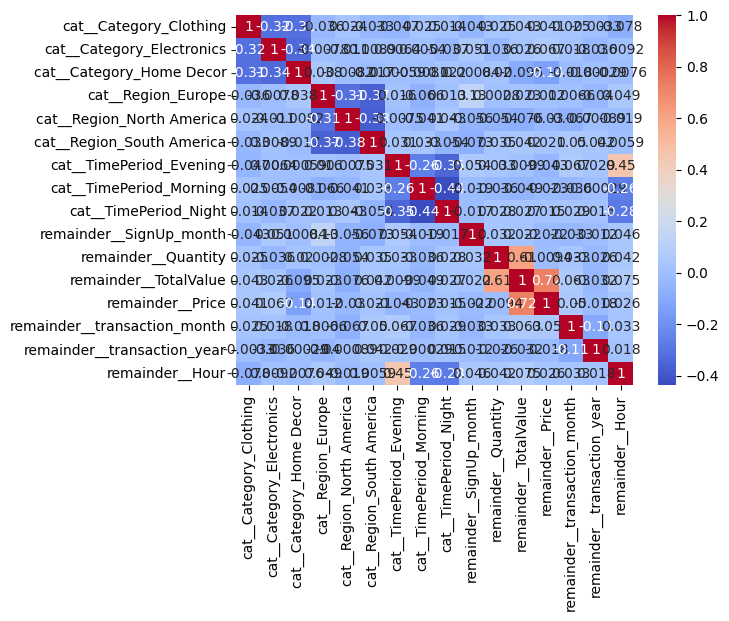

In [52]:
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [53]:
threshold = 0.8

high_corr_pairs = (
    new_df
    .where(np.abs(new_df) > threshold)  # Keep only high correlations
    .stack()  # Convert to pairs
    .reset_index()
)

high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Feature1'] != high_corr_pairs['Feature2']]

print(high_corr_pairs)

NameError: name 'new_df' is not defined